In [ ]:
import numpy as np  
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt  
import seaborn as sns 

Задание № 1 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.



In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
tvalue, pvalue = stats.ttest_rel(A, B)
print('t_value:',tvalue, 'p_value: ',pvalue)

t_value: -2.1701703735210716 p_value:  0.03238579156467659


P > 0,05  значит различия незначительны.

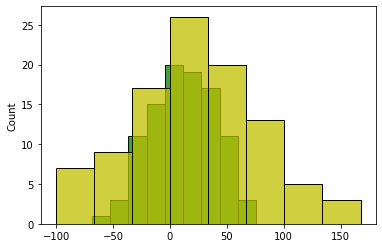

In [ ]:
sns.histplot(data=A, color='g')
sns.histplot(data=B, color='y')

График это подтверждает.

Задание № 2 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

fvalue, pvalue = stats.f_oneway(A, B)
print('f_value:',fvalue, 'p_value: ',pvalue)

f_value: 3.0060646842692673 p_value:  0.08451003973499746


P > 0,05 значит различия незначительны.

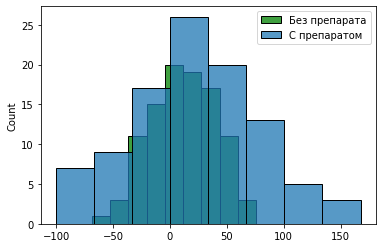

In [ ]:
sns.histplot(data=A, color='g', label='Без препарата')
sns.histplot(data=B, label='С препаратом')
plt.legend()

График это подтверждает.

Задание № 3 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.

Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. 

Есть ли эффект от удобрения по сравнению с минералкой?

Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
print('f_value:',fvalue, 'p_value: ',pvalue)

f_value: 12.525963044834192 p_value:  2.9240047906326866e-05


p < 0,05 значит отвергаем нулевую гипотезу(различия есть).

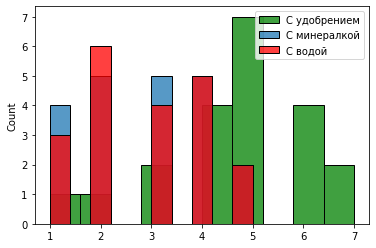

In [ ]:
sns.histplot(nutri, color='g', label='С удобрением',bins=10)
sns.histplot(mineral, label='С минералкой', bins=10)
sns.histplot(water, label='С водой', color='r', bins=10)
plt.legend()

По графику видно, что урожайность выше при поливе удобрением, чем минералкой.

Задание № 1:
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon = pd.read_csv('/content/drive/MyDrive/pokemon.csv', error_bad_lines=False)
pokemon.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
#выделим покемонов класса Grass
class_grass = pokemon.loc[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) \
                      | ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass'))]
class_grass.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [ ]:
#выделим покемонов класса Rock
class_rock = pokemon.loc[((pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock')) \
                      | ((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass'))]
class_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(class_grass['Attack'], class_rock['Attack'])
print('t_value:',tvalue, 'p_value: ',pvalue)

t_value: -3.729457582692065 p_value:  0.00027333381459902653


Нулевая теория отвергается, т.к. p < 0,05, т.е. разница в атаке есть.

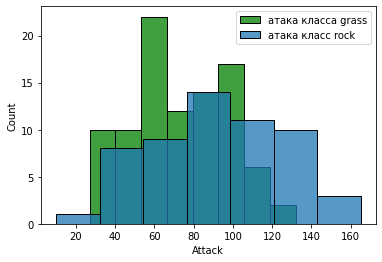

In [ ]:
sns.histplot(class_grass['Attack'], color='g', label='атака класса grass')
sns.histplot(class_rock['Attack'], label='атака класс rock')
plt.legend()

По графику видно, что атака у класса rock больше, чем у класса grass.

Задание № 2:
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
class_water = pokemon.loc[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) \
                      | ((pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water'))]
class_water.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False


In [ ]:
class_normal = pokemon.loc[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) \
                       | ((pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal'))]
class_normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(class_normal['Speed'], class_water['Speed'])
print(f't_value: {tvalue}, p_value: {pvalue}')

t_value: 2.150913330007121, p_value: 0.03255353551391033


Нулевая гипотеза отвергается, различия в скорости есть.

In [ ]:
print(f"Средняя скорость класса Normal {round(class_normal['Speed'].mean(), 2)}, средняя скорость класса Water {round(class_water['Speed'].mean(), 2)}")

Средняя скорость класса Normal 72.26, средняя скорость класса Water 64.94


Задание № 3:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
#выделим покемонов, которым давали сыворотку, затем отделим оих от остальных покемонов
grade_pokemon = pokemon[pokemon['Name'].isin(treathed_pokemon)]
grade_pokemon.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
other_pokemon = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
other_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(grade_pokemon['Speed'], other_pokemon['Speed'])
print(f't_value: {tvalue}, p_value: {pvalue}')

t_value: 5.385407401082377, p_value: 9.51510117630786e-08


Нулевая гипотеза отвергается, разница в скорости есть, причем значительная.

In [ ]:
print(f"Средняя скорость грейженных покемонов {round(grade_pokemon['Speed'].mean(), 2)}, средняя скорость обычных покемонов {round(other_pokemon['Speed'].mean(), 2)}")

Средняя скорость грейженных покемонов 145.0, средняя скорость обычных покемонов 67.89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


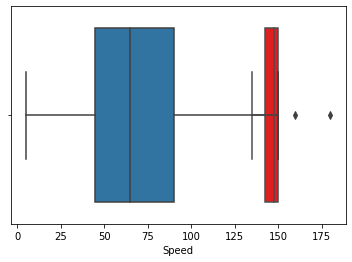

In [ ]:
sns.boxplot(grade_pokemon['Speed'], color='r')
sns.boxplot(other_pokemon['Speed'])

Задание № 5:
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
#выделим легендарных покемонов и отделим их от остальных
legendary_pok = pokemon[pokemon['Legendary']]
legendary_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


In [ ]:
usual_pok = pokemon[~pokemon['Legendary']]
usual_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
tvalue, pvalue = stats.ttest_ind(legendary_pok.loc[:, 'HP':'Defense'].sum(1), usual_pok.loc[:, 'HP':'Defense'].sum(1))
print(f't_value: {tvalue}, p_value: {pvalue}')

t_value: 11.591852366462316, p_value: 7.970942205722087e-29


In [ ]:
tvalue, pvalue = stats.ttest_ind(legendary_pok['HP'] * legendary_pok['Attack'] * legendary_pok['Defense'], 
                                 usual_pok['HP'] * usual_pok['Attack'] * usual_pok['Defense'])
print(f't_value: {tvalue}, p_value: {pvalue}')

t_value: 13.263253408231844, p_value: 1.992664308842282e-36


Нулевая гипотеза отвергаетcя, характеристики у легендарных покемонов значительно выше. 

Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
fvalue, pvalue = stats.f_oneway(pokemon[pokemon['Class 1'] == 'Rock'].Defense, 
                                pokemon[pokemon['Class 1'] == 'Ground'].Defense,
                                pokemon[pokemon['Class 1'] == 'Steel'].Defense,
                                pokemon[pokemon['Class 1'] == 'Ice'].Defense)
print('f_value:',fvalue, 'p_value: ',pvalue)

f_value: 10.576882027817977 p_value:  3.0803014649204294e-06


Нулевая гипотеза отвергается, различия есть.

In [ ]:
def_rock = pokemon[pokemon['Class 1'] == 'Rock'].Defense.sum()
def_ground = pokemon[pokemon['Class 1'] == 'Ground'].Defense.sum()
def_steel = pokemon[pokemon['Class 1'] == 'Steel'].Defense.sum()
def_ice = pokemon[pokemon['Class 1'] == 'Ice'].Defense.sum()
print(f'Защита класса Рок {def_rock}, Защита класса Земля {def_ground}, Защита класса Сталь {def_steel}, Защита класса Лед {def_ice}')

Защита класса Рок 4435, Защита класса Земля 2715, Защита класса Сталь 3412, Защита класса Лед 1714
